In [65]:
from citipy import citipy
from random import randint
import openweathermapy.core as owm
from config import api_key
import matplotlib as plt

In [101]:
def newpoint():
   return randint(-180,180), randint(-90, 90)

coordinates =[]

points = (newpoint() for x in range(20))
for point in points:
   #print (point)
   coordinates.append(point)


In [102]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))


In [103]:
city_names = []

for city in cities:
    country_code = city.country_code
    name = city.city_name
    city_names.append(name)
    #print(f"The country code of {name} is '{country_code}'.")

In [107]:
settings = {"units": "Imperial","APPID" : api_key}

counter = 0
citypy_list = []
for a in city_names:
    try:
        data = owm.get_current(a, **settings)
        citypy_list.append(data)
        print (f"Data for {data['name']} is being processed and its City ID is {data['id']}")
    except:
        counter += 1

print (counter)

Data for Nanortalik is being processed and its City ID is 3421765
Data for Conde is being processed and its City ID is 3465713
Data for Lebu is being processed and its City ID is 344979
Data for Port Alfred is being processed and its City ID is 964432
Data for Port Alfred is being processed and its City ID is 964432
Data for Dikson is being processed and its City ID is 1507390
Data for Torbay is being processed and its City ID is 6167817
Data for Ushuaia is being processed and its City ID is 3833367
Data for Ushuaia is being processed and its City ID is 3833367
Data for Chimbote is being processed and its City ID is 3698304
Data for Saint-Philippe is being processed and its City ID is 6138908
Data for Ushuaia is being processed and its City ID is 3833367
Data for Sao Filipe is being processed and its City ID is 3374210
Data for Ushuaia is being processed and its City ID is 3833367
Data for Bredasdorp is being processed and its City ID is 1015776
Data for Port Elizabeth is being process

In [92]:
print (len(citypy_list))

339


In [93]:
import pprint
pprint.pprint (citypy_list[2])

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1522709640,
 'id': 5106834,
 'main': {'humidity': 28,
          'pressure': 1019,
          'temp': 42.44,
          'temp_max': 46.4,
          'temp_min': 39.2},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 2088,
         'message': 0.1649,
         'sunrise': 1522665232,
         'sunset': 1522711399,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 9.17}}


In [94]:
import pandas as pd

latitude = []
humidity = []
wind_speed = []
temperature = []
City_name = []
City_Country = []
Cloudiness = []
City_id = []

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

for a in citypy_list:
    latitude.append(a['coord']['lat'])
    humidity.append(a['main']['humidity'])
    wind_speed.append(a['wind']['speed'])
    temperature.append(a['main']['temp'])
    City_name.append(a['name'])
    City_Country.append(a['sys']['country'])
    Cloudiness.append(a['clouds']['all'])
    City_id.append(a['id'])
    
b = {'Latitude' : latitude, 'City_Country' : City_Country, 'Humidity (%)' : humidity, 'Temperature' : temperature, 
     'City_name' : City_name, 'Cloudiness(%)' : Cloudiness, 'Wind_Speed' : wind_speed, 'City_id' :City_id}
#df.columns = ['City_id','latitude', 'humidity', 'wind_speed', 'temperature']

City_data_df = pd.DataFrame(b)

City_data_df.head()

,City_Country,City_id,City_name,Cloudiness(%),Humidity (%),Latitude,Temperature,Wind_Speed
0,GL,3418910,Upernavik,0,84,72.79,14.67,10.87
1,PT,2737599,Saldanha,44,80,41.42,49.95,14.12
2,US,5106834,Albany,75,28,42.65,42.44,9.17
3,BR,3471609,Areia Branca,20,69,-10.76,82.40,8.05
4,GL,3831208,Qaanaaq,0,74,77.48,-3.20,7.74


In [95]:
City_data_df.to_csv("City_data_output.csv")

In [96]:
print (owm.BASE_URL)

http://api.openweathermap.org/data/2.5/


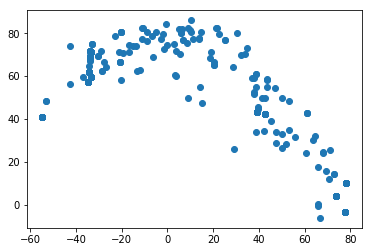

In [99]:
import matplotlib.pyplot as plt
plt.scatter(latitude, temperature)
plt.show()

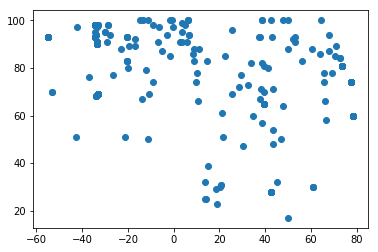

In [100]:
plt.scatter(latitude, humidity)
plt.show()